In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [95]:
df = pd.read_csv("expenses.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.shape

(1338, 7)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
numeric = []

categoric = []

categoric = df.select_dtypes(include='object')

numeric = df.select_dtypes(include=["int64", "float64"])
numeric

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


<Figure size 640x480 with 0 Axes>

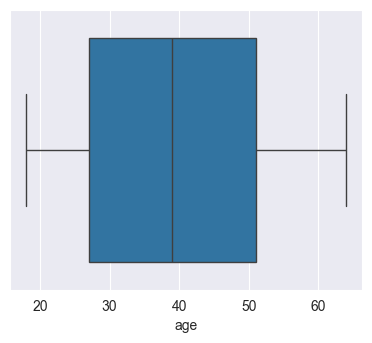

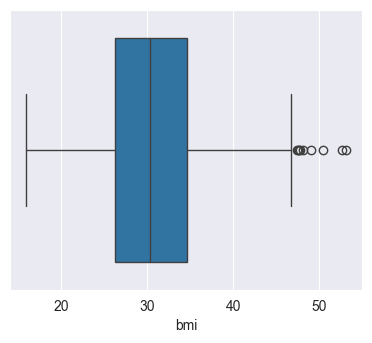

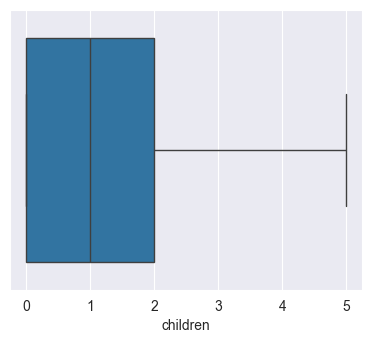

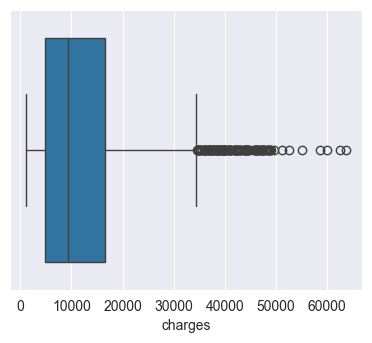

In [101]:
plt.suptitle("Outliers in Numeric Dataset")

for i,col in enumerate(numeric):
    plt.figure(figsize = (10,8))
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(data= df, x =col,ax=ax)
    plt.show()

In [102]:
# BMI sütununda aykırı değerler

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

print(outliers)

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [103]:
# categorical = data.select_dtypes("object").columns
for i in categoric:
    print('\033[1m'+i+'\033[0m')
    print(df[i].value_counts())
    print("*"*20)

sex
sex
male      676
female    662
Name: count, dtype: int64
********************
smoker
smoker
no     1064
yes     274
Name: count, dtype: int64
********************
region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
********************


<Figure size 1000x800 with 0 Axes>

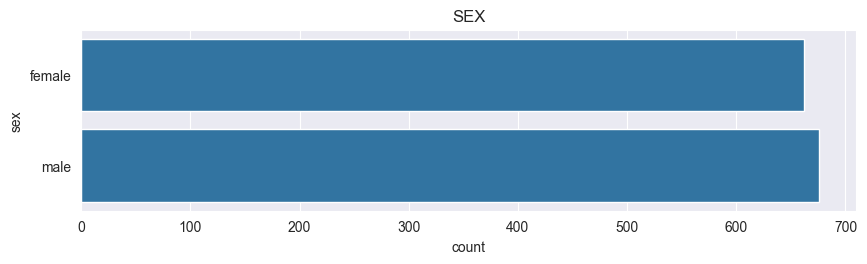

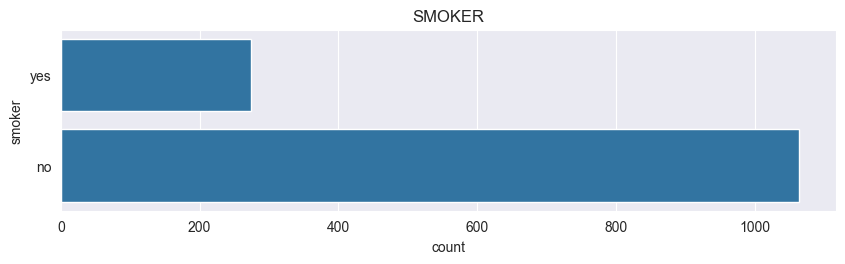

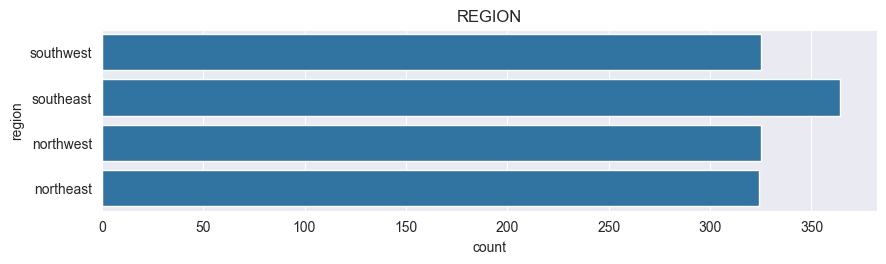

In [104]:
plt.figure(figsize = (10,8))
plt.suptitle("Visualizing the counts of categorical Data",fontsize=18)
for i,col in enumerate(categoric):
    plt.figure(figsize = (10,8))
    ax = plt.subplot(3,1,i+1)
    sns.countplot(df[col],ax = ax)
    ax.set_title(col.upper())
    plt.show()

In [105]:
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'northeast':1,'northwest':2,'southeast':3,'southwest':4})


In [106]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [108]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Hedef değişken, müşteri için harcama -> charges

In [109]:
X = df.drop(columns="charges", axis=1) # axis-column arasındaki farka dikkat et.
y = df["charges"]

In [110]:
print(len(X))
print(len(y))

1338
1338


In [111]:
X.head(10)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,4
1,18,1,33.770,1,0,3
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
5,31,0,25.740,0,0,3
6,46,0,33.440,1,0,3
7,37,0,27.740,3,0,2
8,37,1,29.830,2,0,1
9,60,0,25.840,0,0,2


In [112]:
y.head(10)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [114]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

1003 1003 335 335


In [115]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [116]:
# predicting test data
predictions = model.predict(X_test)

In [117]:
#predictions

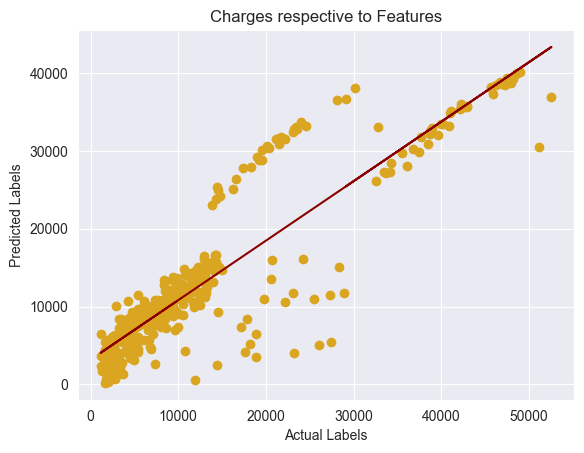

In [118]:
plt.scatter(y_test, predictions,color = 'goldenrod')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Charges respective to Features')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='darkred')
plt.show()

In [119]:
print(model.coef_)
print(model.intercept_)

[ 2.50537556e+02  3.65092141e+00  3.22881906e+02  4.50147445e+02
  2.36021161e+04 -3.41244000e+02]
-10919.894825253099


In [120]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 32073628.56010921
RMSE: 5663.358417062195
R2: 0.7962732059725786


İlk olarak kategorik değerler encode edildi, manuel bir şekilde.
Akabinde Lineer Reg. yapıldı.


In [121]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [122]:
y_pred = regressor.predict(X_test)

print("R2-score: %.2f" % r2_score(y_test, y_pred))

R2-score: 0.88


In [123]:
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [125]:
y_pred_e = model.predict(X_test)

In [126]:
r2 = r2_score(y_test, y_pred)

In [127]:
print(f'R² Score: {r2}')

R² Score: 0.8762515270115143


### StandartScaler

In [128]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [129]:
# Lineer Regresyon modelini eğitme
lr_model = LinearRegression()
lr_model.fit(X_train_s, y_train)
lr_predictions = lr_model.predict(X_test_s)


lr_r2 = r2_score(y_test, lr_predictions)
print(f"StandardScaler ile ölçeklenmiş Lineer Regresyon R² skoru: {lr_r2:.6f}")


StandardScaler ile ölçeklenmiş Lineer Regresyon R² skoru: 0.796273


In [137]:
# Random Forest modelini eğitme
rf_model = RandomForestRegressor()
rf_model.fit(X_train_s, y_train)
rf_predictions = rf_model.predict(X_test_s)


rf_r2 = r2_score(y_test, rf_predictions)
print(f"StandardScaler ile ölçeklenmiş Random Forest R² skoru: {rf_r2:.6f}")


StandardScaler ile ölçeklenmiş Random Forest R² skoru: 0.875945


In [138]:
# Gradient Boosting modelini eğitme
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_s, y_train)
gb_predictions = gb_model.predict(X_test_s)


gb_r2 = r2_score(y_test, gb_predictions)
print(f"StandardScaler ile ölçeklenmiş Gradient Boosting R² skoru: {gb_r2:.6f}")


StandardScaler ile ölçeklenmiş Gradient Boosting R² skoru: 0.898031


In [132]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)

poly_r2 = r2_score(y_test, poly_predictions)
print(f"Polynomial Features ile Lineer Regresyon R² skoru: {poly_r2}")


Polynomial Features ile Lineer Regresyon R² skoru: 0.8846283666147676


### Aykırı Değerler üzerinde İşlemler

In [139]:
# Boxcox sadece pozitif verilere uygulanabilir. Veri setinde - değerler olduğu için ilk başta negatif değerler üzerinde işlemler yapmak yerine "yeo-johnson" uygulayalım.

from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')
df['bmi_transformed'] = pt.fit_transform(df[['bmi']])


print(df[['bmi', 'bmi_transformed']].describe())


               bmi  bmi_transformed
count  1338.000000     1.338000e+03
mean     30.663397    -1.359484e-15
std       6.098187     1.000374e+00
min      15.960000    -2.772077e+00
25%      26.296250    -6.904439e-01
50%      30.400000     1.060133e-02
75%      34.693750     6.913956e-01
max      53.130000     3.190165e+00


In [141]:
# Dönüştürülmüş 'bmi' sütunu kullanarak yeni veri seti oluşturma

df_transformed = df.drop(columns=['bmi'])
X = df_transformed.drop('charges', axis=1)
y = df_transformed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_s, y_train)
lr_predictions = lr_model.predict(X_test_s)
print(f"Yeo-Johnson/Box-Cox dönüşümü sonrası Lineer Regresyon R² skoru: {r2_score(y_test, lr_predictions):.6f}")


rf_model = RandomForestRegressor()
rf_model.fit(X_train_s, y_train)
rf_predictions = rf_model.predict(X_test_s)
print(f"Yeo-Johnson/Box-Cox dönüşümü sonrası Random Forest R² skoru: {r2_score(y_test, rf_predictions):.6f}")


gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_s, y_train)
gb_predictions = gb_model.predict(X_test_s)
print(f"Yeo-Johnson/Box-Cox dönüşümü sonrası Gradient Boosting R² skoru: {r2_score(y_test, gb_predictions):.6f}")


Yeo-Johnson/Box-Cox dönüşümü sonrası Lineer Regresyon R² skoru: 0.782605
Yeo-Johnson/Box-Cox dönüşümü sonrası Random Forest R² skoru: 0.864739
Yeo-Johnson/Box-Cox dönüşümü sonrası Gradient Boosting R² skoru: 0.878053


## Polynomial Features 

In [143]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_s)

X_test_poly = poly.transform(X_test_s)

In [144]:
lr_poly_model = LinearRegression()
lr_poly_model.fit(X_poly, y_train)
lr_poly_predictions = lr_poly_model.predict(X_test_poly)

lr_poly_r2 = r2_score(y_test, lr_poly_predictions)
print(f"PolynomialFeatures ile Lineer Regresyon R² skoru: {lr_poly_r2:.6f}")


PolynomialFeatures ile Lineer Regresyon R² skoru: 0.866628


In [148]:

rf_poly_model = RandomForestRegressor()
rf_poly_model.fit(X_poly, y_train)
rf_poly_predictions = rf_poly_model.predict(X_test_poly)

rf_poly_r2 = r2_score(y_test, rf_poly_predictions)
print(f"PolynomialFeatures ile Random Forest R² skoru: {rf_poly_r2:.6f}")


PolynomialFeatures ile Random Forest R² skoru: 0.863313


In [149]:

gb_poly_model = GradientBoostingRegressor()
gb_poly_model.fit(X_poly, y_train)
gb_poly_predictions = gb_poly_model.predict(X_test_poly)

gb_poly_r2 = r2_score(y_test, gb_poly_predictions)
print(f"PolynomialFeatures ile Gradient Boosting R² skoru: {gb_poly_r2:.6f}")


PolynomialFeatures ile Gradient Boosting R² skoru: 0.873390
